### 擴增圖片

#### 模糊

In [ ]:
import os
import cv2
import random
import numpy as np

def read_images(folder):
    # 讀取資料夾中的檔案清單
    filenames = os.listdir(folder)

    # 迭代每個檔案
    for filename in filenames:
        # 取得檔案的完整路徑
        filepath = os.path.join(folder, filename)

        # 如果檔案是資料夾，就繼續遞迴
        if os.path.isdir(filepath):
            read_images(filepath)
        # 否則，如果是圖片，就讀取圖片
        elif filepath.endswith('.jpg') or filepath.endswith('.png') or filepath.endswith('.JPG') or filepath.endswith('.PNG') or filepath.endswith('.jpeg') or filepath.endswith('.JPEG') or filepath.endswith('.Jpeg') or filepath.endswith('.bmp'):
            try:
                # 使用 cv2.imread 讀取圖片
                image = cv2.imread(filepath)

                # 取得圖片所在資料夾的路徑
                image_folder = os.path.dirname(filepath)

                # 取得圖片所在資料夾的名稱
                image_folder_name = os.path.basename(image_folder)

                # 建立用於保存圖片的資料夾
                output_folder = './pytorch-CycleGAN-and-pix2pix/datasets/plates_cycle3/testAA'
                os.makedirs(os.path.join(output_folder, image_folder_name), exist_ok=True)
                
                # 隨機產生 5 張不同噪聲和模糊程度的圖片
                for i in range(5):
                    # 隨機產生模糊程度，這裡使用高斯模糊
                    kernel_size = 5
                    sigma = np.random.randint(5, 20)  # 隨機產生一個介於 5 到 20 之間的整數作為模糊程度
                    image_blur = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

                    # 隨機產生噪聲，這裡使用高斯噪聲
                    mean = 0
                    std = np.random.randint(5, 20)  # 隨機產生一個介於 5 到 20 之間的整數作為噪聲程度
                    noise = np.zeros_like(image_blur)
                    cv2.randn(noise, mean, std)
                    image_noise = cv2.add(image_blur, noise)

                    # 將處理後的圖片保存到用於保存圖片的資料夾中
                    cv2.imwrite(os.path.join(output_folder, image_folder_name, f"{filename[:-4]}_{i}.jpg"), image_noise)

            except Exception as e:
                print(f"Error processing image {filename}: {e}")

read_images('./pytorch-CycleGAN-and-pix2pix/datasets/plates_cycle3/testA')

#### 清晰

In [ ]:
import os
import cv2

def read_images(folder):
    # 讀取資料夾中的檔案清單
    filenames = os.listdir(folder)

    # 迭代每個檔案
    for filename in filenames:
        # 取得檔案的完整路徑
        filepath = os.path.join(folder, filename)

        # 如果檔案是資料夾，就繼續遞迴
        if os.path.isdir(filepath):
            read_images(filepath)
        # 否則，如果是圖片，就讀取圖片
        elif filepath.endswith('.jpg') or filepath.endswith('.png') or filepath.endswith('.JPG') or filepath.endswith('.PNG') or filepath.endswith('.jpeg') or filepath.endswith('.JPEG') or filepath.endswith('.Jpeg') or filepath.endswith('.bmp'):
            try:
                # 使用 cv2.imread 讀取圖片
                image = cv2.imread(filepath)

                # 取得圖片所在資料夾的路徑
                image_folder = os.path.dirname(filepath)

                # 取得圖片所在資料夾的名稱
                image_folder_name = os.path.basename(image_folder)

                # 建立用於保存圖片的資料夾
                output_folder = './pytorch-CycleGAN-and-pix2pix/datasets/plates_cycle3/'
                os.makedirs(os.path.join(output_folder, image_folder_name), exist_ok=True)
                
                # 複製 5 張圖片
                for i in range(5):
                    # 將圖片保存到用於保存圖片的資料夾中
                    cv2.imwrite(os.path.join(output_folder, image_folder_name, f"{filename[:-4]}_{i}.jpg"), image)

            except Exception as e:
                print(f"Error processing image {filename}: {e}")

read_images('./pytorch-CycleGAN-and-pix2pix/datasets/plates_cycle3/')


### 移動圖片到其他資料夾(輔助用)

In [ ]:
import os
import shutil

source_folder = './pytorch-CycleGAN-and-pix2pix/results/test_real/licenseplate_cycle3/test_latest/images/'
destination_folder = './ESRGAN/LR'

# 创建目标文件夹
os.makedirs(destination_folder, exist_ok=True)

# 获取原始文件夹内所有文件的列表
file_list = os.listdir(source_folder)

# 遍历每个文件，筛选出包含"fake"字符串的图片文件并复制到目标文件夹，删除文件名中的"_fake"字符串
for file_name in file_list:
    if 'fake' in file_name and (file_name.endswith('.jpg') or file_name.endswith('.png')):
        source_path = os.path.join(source_folder, file_name)
        new_file_name = file_name.replace('_fake', '')
        destination_path = os.path.join(destination_folder, new_file_name)
        shutil.copy(source_path, destination_path)
        print(f"Copied and renamed file: {file_name} -> {new_file_name}")

print("Copy and rename operation completed.")


In [ ]:
import os
import shutil

source_folder = './ACLERP/RP_test/'
destination_folder = './ESRGAN/LR/'


# 创建目标文件夹
os.makedirs(destination_folder, exist_ok=True)

# 获取原始文件夹内所有文件的列表
file_list = os.listdir(source_folder)

# 遍历每个文件，将其移动到目标文件夹，并进行重新命名
count = 1
for file_name in file_list:
    if file_name.endswith('.jpg') or file_name.endswith('.png'):
        source_path = os.path.join(source_folder, file_name)
        new_file_name = str(count) + file_name[file_name.rindex('.'):]
        destination_path = os.path.join(destination_folder, new_file_name)
        shutil.copy(source_path, destination_path)
        print(f"Moved and renamed file: {file_name} -> {new_file_name}")
        count += 1

print("Move and rename operation completed.")


### OCR辨識(單張)

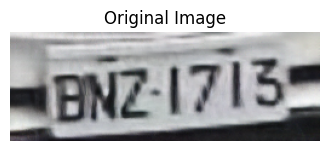

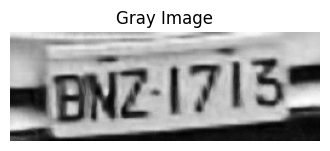

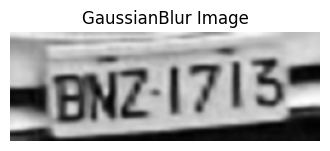

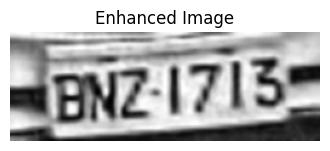

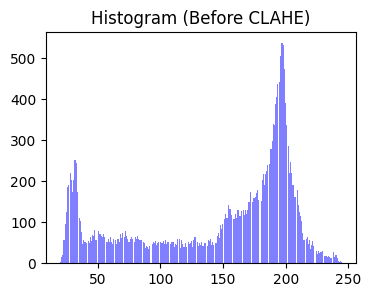

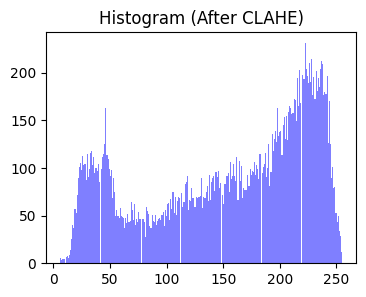

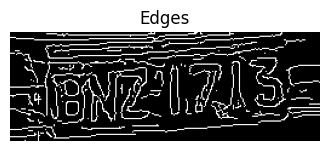

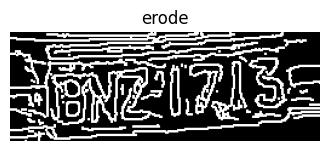

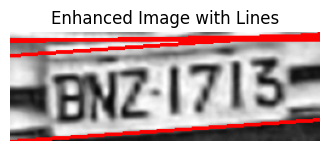

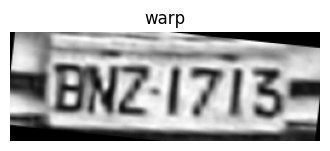

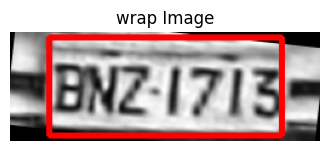

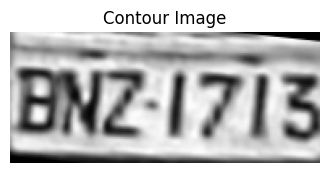

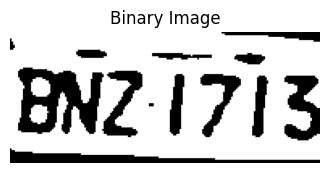

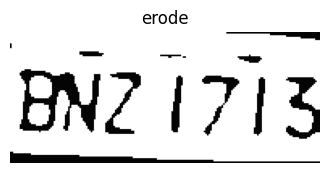

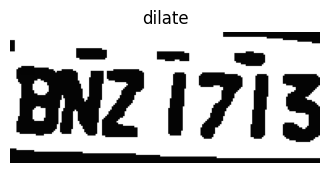

執行時間： 2.186779260635376 秒


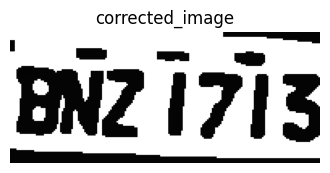

Character Count: 7 

License Plate Text: BNZ1713



In [1]:
import cv2
import numpy as np
import pytesseract
import os
import matplotlib.pyplot as plt
import time

pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract.exe'

def detect_skewed_license_plate(image):
    target_size = (256, 90)
    image = cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)

    # 顯示原始圖片
    plt.figure(figsize=(4, 3))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Original Image')
    plt.show()

    # 轉換為灰階圖像
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # 顯示灰階圖像
    plt.figure(figsize=(4, 3))
    plt.imshow(gray, cmap='gray')
    plt.axis('off')
    plt.title('Gray Image')
    plt.show()

    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # 顯示灰階圖像
    plt.figure(figsize=(4, 3))
    plt.imshow(gray, cmap='gray')
    plt.axis('off')
    plt.title('GaussianBlur Image')
    plt.show()

    # 使用自適應直方圖均衡化增強亮度
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray)

    # 顯示增強亮度後的圖像
    plt.figure(figsize=(4, 3))
    plt.imshow(enhanced, cmap='gray')
    plt.axis('off')
    plt.title('Enhanced Image')
    plt.show()

    # 顯示自適應直方圖均衡化前的直方圖
    plt.figure(figsize=(4, 3))
    plt.hist(gray.ravel(), bins=256, color='blue', alpha=0.5)
    plt.title('Histogram (Before CLAHE)')
    plt.show()

    # 顯示自適應直方圖均衡化後的直方圖
    plt.figure(figsize=(4, 3))
    plt.hist(enhanced.ravel(), bins=256, color='blue', alpha=0.5)
    plt.title('Histogram (After CLAHE)')
    plt.show()


    edges = cv2.Canny(enhanced,30,90) 

    # 顯示邊緣檢測後的圖像
    plt.figure(figsize=(4, 3))
    plt.imshow(edges, cmap='gray')
    plt.axis('off')
    plt.title('Edges')
    plt.show()

    # 侵蝕和膨脹操作
    kernel = np.ones((2, 2), np.uint8)
    edges = cv2.dilate(edges, kernel, iterations=1)

    # 顯示矯正後的圖片dilate erode
    plt.figure(figsize=(4, 3))
    plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('erode')
    plt.show()
    


    # 快速廣義霍夫轉換
    lines = cv2.HoughLines(edges, 1, np.pi/180, threshold=100)

    # 判斷是否找到線條
    if lines is None:
        # 找不到線條，返回原始圖像
        return image

    enhanced_color = cv2.cvtColor(enhanced, cv2.COLOR_GRAY2BGR)
    # 繪製直線
    for line in lines[:4]:  # 只繪製前兩條直線
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
    
        cv2.line(enhanced_color, (x1, y1), (x2, y2), (255, 0, 0), 2)
        

    # 顯示繪製線條後的增強亮度圖像
    plt.figure(figsize=(4, 3))
    plt.imshow(enhanced_color)
    plt.axis('off')
    plt.title('Enhanced Image with Lines')
    plt.show()

    # 找到最佳角度
    best_angle = 0
    max_votes = 0

    for line in lines:
        rho, theta = line[0]
        angle = np.degrees(theta) - 90  # 轉換為角度並進行校正

        # 篩選出合適的角度範圍
        if -45 < angle < 45:
            votes = np.sum(np.abs(rho - edges.dot(np.cos(theta))) / np.linalg.norm([np.cos(theta), np.sin(theta)]))

            if votes > max_votes:
                max_votes = votes
                best_angle = angle

    # 進行矯正
    rows, cols = enhanced.shape[:2]
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), best_angle, 1)
    warp = cv2.warpAffine(enhanced, M, (cols, rows))

    # 顯示矯正後的圖片
    plt.figure(figsize=(4, 3))
    plt.imshow(cv2.cvtColor(warp, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('warp')
    plt.show()


    warp = cv2.cvtColor(warp, cv2.COLOR_GRAY2BGR)
    no_crop = warp.copy()
    global crop_img
    #crop_img = img.copy()
    contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 遍歷輪廓
    for c in contours:
        area = cv2.contourArea(c)
        c = max(contours, key=cv2.contourArea)
        
        # 設定最小面積閾值，可根據需要進行調整
        min_area = 70
        
        if area <= min_area:
            continue
        
        # 取得輪廓的矩形範圍
        (x, y, w, h) = cv2.boundingRect(c)

        # 計算裁切區域的比例
        width_ratio = 0.75  # 寬度的比例
        height_ratio = 0.9 # 高度的比例

        # 根據圖片的實際寬度和高度計算裁切區域的大小
        crop_w = int(width_ratio * image.shape[1])
        crop_h = int(height_ratio * image.shape[0])

        # 調整裁切區域的位置，使其居中或根據需求進行微調
        crop_x = max(0, int((image.shape[1] - crop_w) / 2))
        crop_y = max(0, int((image.shape[0] - crop_h) / 2))

        # 根據調整後的裁切區域進行裁切
        corrected_image = no_crop[crop_y:crop_y + crop_h, crop_x:crop_x + crop_w]
        
        # 繪製輪廓及裁切區域
        cv2.rectangle(warp, (crop_x, crop_y), (crop_x + crop_w, crop_y + crop_h), (255, 0, 0), 3)



    # 顯示繪製最大輪廓後的圖像
    plt.figure(figsize=(4, 3))
    plt.imshow(warp)
    plt.axis('off')
    plt.title('wrap Image')
    plt.show()

    # 顯示繪製最大輪廓後的圖像
    plt.figure(figsize=(4, 3))
    plt.imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Contour Image')
    plt.show()


    corrected_image = cv2.GaussianBlur(corrected_image, (5, 5), 0)

    # 使用自適應二值化
    ret, binary = cv2.threshold(corrected_image, 127, 255, cv2.THRESH_BINARY)


    # 顯示矯正後的圖片
    plt.figure(figsize=(4, 3))
    plt.imshow(cv2.cvtColor(binary, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Binary Image')
    plt.show()

    binary = cv2.cvtColor(binary, cv2.COLOR_BGR2GRAY)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    corrected_image= clahe.apply(binary)

    # 侵蝕和膨脹操作
    kernel = np.ones((3, 3), np.uint8)
    erode = cv2.dilate(corrected_image, kernel, iterations=1)

    # 顯示矯正後的圖片dilate erode
    plt.figure(figsize=(4, 3))
    plt.imshow(cv2.cvtColor(erode, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('erode')
    plt.show()

    corrected_image = cv2.erode(erode, kernel, iterations=2)

    # 顯示矯正後的圖片
    plt.figure(figsize=(4, 3))
    plt.imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('dilate')
    plt.show()
    

    # 使用OCR識別車牌
    license_plate_text = pytesseract.image_to_string(corrected_image, lang='eng',
                                                     config='--psm 8 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
                                                     

    return corrected_image, license_plate_text


# 圖片路徑
image_path = "./ESRGAN/results/1.png"


# 讀取圖片
image = cv2.imread(image_path)

# 記錄開始時間
start_time = time.time()

# 偵測傾斜車牌並進行矯正及辨識
corrected_image, license_plate_text= detect_skewed_license_plate(image)


# 記錄結束時間
end_time = time.time()

# 計算執行時間
execution_time = end_time - start_time

# 顯示執行時間
print("執行時間：", execution_time, "秒")

# 顯示原始圖片
plt.figure(figsize=(4, 3))
plt.imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('corrected_image')
plt.show()

char_count = len(license_plate_text) - 1

print("Character Count:", char_count, "\n")
print("License Plate Text:", license_plate_text)

### OCR辨識整個資料夾 (保存txt檔)

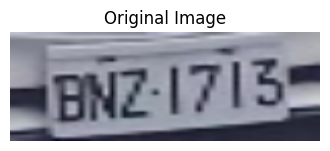

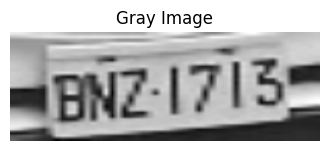

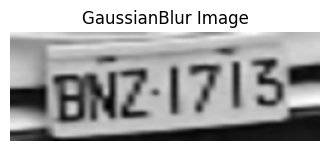

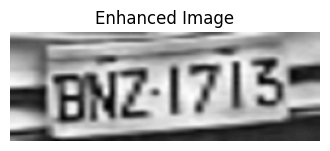

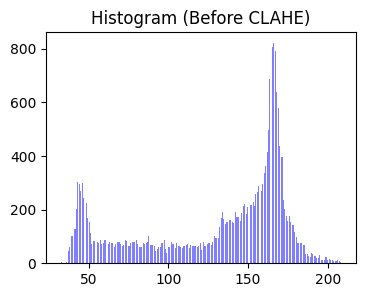

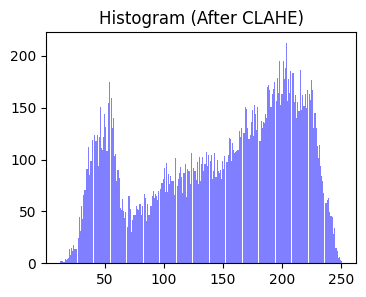

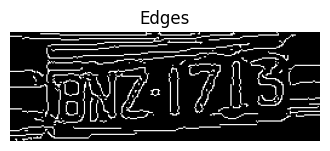

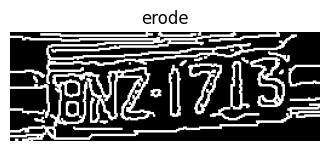

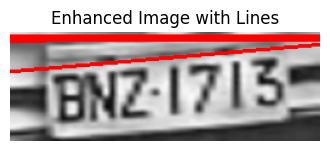

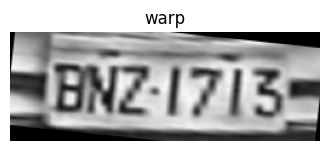

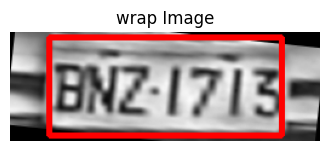

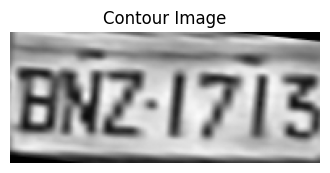

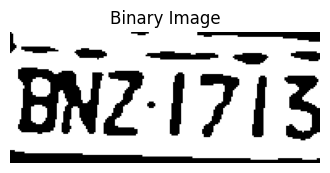

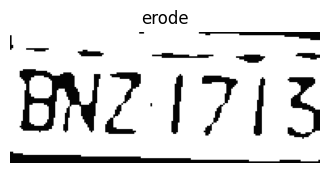

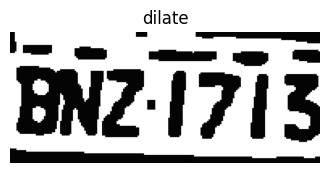

處理了 car2.jpg 並將OCR結果儲存到 car2.txt
總體執行時間： 1.875744104385376 秒


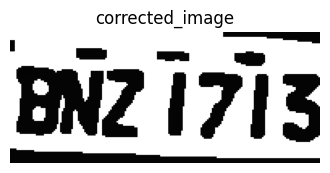

Character Count: 7 

License Plate Text: BNZ1713



In [13]:
import cv2
import numpy as np
import pytesseract
import os
import matplotlib.pyplot as plt
import time

pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract.exe'

def detect_skewed_license_plate(image):
    target_size = (256, 90)
    image = cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)

    # 顯示原始圖片
    plt.figure(figsize=(4, 3))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Original Image')
    plt.show()

    # 轉換為灰階圖像
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # 顯示灰階圖像
    plt.figure(figsize=(4, 3))
    plt.imshow(gray, cmap='gray')
    plt.axis('off')
    plt.title('Gray Image')
    plt.show()

    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # 顯示灰階圖像
    plt.figure(figsize=(4, 3))
    plt.imshow(gray, cmap='gray')
    plt.axis('off')
    plt.title('GaussianBlur Image')
    plt.show()

    # 使用自適應直方圖均衡化增強亮度
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray)

    # 顯示增強亮度後的圖像
    plt.figure(figsize=(4, 3))
    plt.imshow(enhanced, cmap='gray')
    plt.axis('off')
    plt.title('Enhanced Image')
    plt.show()

    # 顯示自適應直方圖均衡化前的直方圖
    plt.figure(figsize=(4, 3))
    plt.hist(gray.ravel(), bins=256, color='blue', alpha=0.5)
    plt.title('Histogram (Before CLAHE)')
    plt.show()

    # 顯示自適應直方圖均衡化後的直方圖
    plt.figure(figsize=(4, 3))
    plt.hist(enhanced.ravel(), bins=256, color='blue', alpha=0.5)
    plt.title('Histogram (After CLAHE)')
    plt.show()


    edges = cv2.Canny(enhanced,30,90) 

    # 顯示邊緣檢測後的圖像
    plt.figure(figsize=(4, 3))
    plt.imshow(edges, cmap='gray')
    plt.axis('off')
    plt.title('Edges')
    plt.show()

    # 侵蝕和膨脹操作
    kernel = np.ones((2, 2), np.uint8)
    edges = cv2.dilate(edges, kernel, iterations=1)

    # 顯示矯正後的圖片dilate erode
    plt.figure(figsize=(4, 3))
    plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('erode')
    plt.show()
    


    # 快速廣義霍夫轉換
    lines = cv2.HoughLines(edges, 1, np.pi/180, threshold=100)

    # 判斷是否找到線條
    if lines is None:
        # 找不到線條，返回原始圖像
        return image

    enhanced_color = cv2.cvtColor(enhanced, cv2.COLOR_GRAY2BGR)
    # 繪製直線
    for line in lines[:4]:  # 只繪製前兩條直線
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
    
        cv2.line(enhanced_color, (x1, y1), (x2, y2), (255, 0, 0), 2)
        

    # 顯示繪製線條後的增強亮度圖像
    plt.figure(figsize=(4, 3))
    plt.imshow(enhanced_color)
    plt.axis('off')
    plt.title('Enhanced Image with Lines')
    plt.show()

    # 找到最佳角度
    best_angle = 0
    max_votes = 0

    for line in lines:
        rho, theta = line[0]
        angle = np.degrees(theta) - 90  # 轉換為角度並進行校正

        # 篩選出合適的角度範圍
        if -45 < angle < 45:
            votes = np.sum(np.abs(rho - edges.dot(np.cos(theta))) / np.linalg.norm([np.cos(theta), np.sin(theta)]))

            if votes > max_votes:
                max_votes = votes
                best_angle = angle

    # 進行矯正
    rows, cols = enhanced.shape[:2]
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), best_angle, 1)
    warp = cv2.warpAffine(enhanced, M, (cols, rows))

    # 顯示矯正後的圖片
    plt.figure(figsize=(4, 3))
    plt.imshow(cv2.cvtColor(warp, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('warp')
    plt.show()


    warp = cv2.cvtColor(warp, cv2.COLOR_GRAY2BGR)
    no_crop = warp.copy()
    global crop_img
    #crop_img = img.copy()
    contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 遍歷輪廓
    for c in contours:
        area = cv2.contourArea(c)
        c = max(contours, key=cv2.contourArea)
        
        # 設定最小面積閾值，可根據需要進行調整
        min_area = 70
        
        if area <= min_area:
            continue
        
        # 取得輪廓的矩形範圍
        (x, y, w, h) = cv2.boundingRect(c)

        # 計算裁切區域的比例
        width_ratio = 0.75  # 寬度的比例
        height_ratio = 0.9 # 高度的比例

        # 根據圖片的實際寬度和高度計算裁切區域的大小
        crop_w = int(width_ratio * image.shape[1])
        crop_h = int(height_ratio * image.shape[0])

        # 調整裁切區域的位置，使其居中或根據需求進行微調
        crop_x = max(0, int((image.shape[1] - crop_w) / 2))
        crop_y = max(0, int((image.shape[0] - crop_h) / 2))

        # 根據調整後的裁切區域進行裁切
        corrected_image = no_crop[crop_y:crop_y + crop_h, crop_x:crop_x + crop_w]
        
        # 繪製輪廓及裁切區域
        cv2.rectangle(warp, (crop_x, crop_y), (crop_x + crop_w, crop_y + crop_h), (255, 0, 0), 3)



    # 顯示繪製最大輪廓後的圖像
    plt.figure(figsize=(4, 3))
    plt.imshow(warp)
    plt.axis('off')
    plt.title('wrap Image')
    plt.show()

    # 顯示繪製最大輪廓後的圖像
    plt.figure(figsize=(4, 3))
    plt.imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Contour Image')
    plt.show()


    corrected_image = cv2.GaussianBlur(corrected_image, (5, 5), 0)

    # 使用自適應二值化
    ret, binary = cv2.threshold(corrected_image, 127, 255, cv2.THRESH_BINARY)


    # 顯示矯正後的圖片
    plt.figure(figsize=(4, 3))
    plt.imshow(cv2.cvtColor(binary, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Binary Image')
    plt.show()

    binary = cv2.cvtColor(binary, cv2.COLOR_BGR2GRAY)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    corrected_image= clahe.apply(binary)

    # 侵蝕和膨脹操作
    kernel = np.ones((3, 3), np.uint8)
    erode = cv2.dilate(corrected_image, kernel, iterations=1)

    # 顯示矯正後的圖片dilate erode
    plt.figure(figsize=(4, 3))
    plt.imshow(cv2.cvtColor(erode, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('erode')
    plt.show()

    corrected_image = cv2.erode(erode, kernel, iterations=2)

    # 顯示矯正後的圖片
    plt.figure(figsize=(4, 3))
    plt.imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('dilate')
    plt.show()
    

    # 使用OCR識別車牌
    license_plate_text = pytesseract.image_to_string(corrected_image, lang='eng',
                                                     config='--psm 8 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789')
                                                     

    return corrected_image, license_plate_text

def process_images_in_folder(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    image_files = [f for f in os.listdir(input_folder) if f.endswith('.png') or f.endswith('.jpg')]

    for image_file in image_files:
        image_path = os.path.join(input_folder, image_file)
        image = cv2.imread(image_path)
        corrected_image, license_plate_text = detect_skewed_license_plate(image)

        # 創建txt檔案並將OCR結果寫入其中
        txt_filename = os.path.splitext(image_file)[0] + '.txt'
        txt_path = os.path.join(output_folder, txt_filename)
        with open(txt_path, 'w', encoding='utf-8') as txt_file:
            for char in license_plate_text:
                txt_file.write(char + '\n')

        print(f"處理了 {image_file} 並將OCR結果儲存到 {txt_filename}")

# 設置輸入和輸出資料夾路徑
input_folder = "./pytorch-CycleGAN-and-pix2pix/datasets/test/"
output_folder = "./OCR_txt"

# 計時開始
start_time = time.time()

# 處理圖像資料夾中的圖像並儲存OCR結果
process_images_in_folder(input_folder, output_folder)

# 計時結束
end_time = time.time()

# 計算執行時間
execution_time = end_time - start_time
print("總體執行時間：", execution_time, "秒")

# 顯示原始圖片
plt.figure(figsize=(4, 3))
plt.imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('corrected_image')
plt.show()

char_count = len(license_plate_text) - 1

print("Character Count:", char_count, "\n")
print("License Plate Text:", license_plate_text)

### OCR準確率

In [6]:
import os
import difflib

ocr_results_dir = './OCR_txt'  # 存儲OCR結果的目錄
ground_truth_dir = './OCR_txt_ans'  # 存儲真實標籤的目錄
num_files_to_compare = 1  # 指定要比對的檔案數量

ocr_results_files = os.listdir(ocr_results_dir)[:num_files_to_compare]
ground_truth_files = os.listdir(ground_truth_dir)[:num_files_to_compare]

total_characters = 0
correct_characters = 0

for ocr_file, gt_file in zip(ocr_results_files, ground_truth_files):
    ocr_path = os.path.join(ocr_results_dir, ocr_file)
    gt_path = os.path.join(ground_truth_dir, gt_file)

    with open(ocr_path, 'r') as ocr_file, open(gt_path, 'r') as gt_file:
        ocr_result = ocr_file.read().strip()
        ground_truth = gt_file.read().strip()

    matcher = difflib.SequenceMatcher(None, ocr_result, ground_truth)
    similarity = matcher.ratio()

    correct_characters += int(len(ocr_result) * similarity)
    total_characters += len(ocr_result)

accuracy = (correct_characters / total_characters) * 100

print("Total Characters:", total_characters)
print("Correct Characters:", correct_characters)
print("Accuracy: {:.2f}%".format(accuracy))


Total Characters: 13
Correct Characters: 13
Accuracy: 100.00%


### PSNR

In [10]:
import argparse
import os
import re
import cv2

import numpy as np
from PIL import Image
from skimage.metrics import peak_signal_noise_ratio as psnr
import matplotlib.pyplot as plt


def resize_images(images, size):
    resized_images = [cv2.resize(image, size) for image in images]
    return resized_images


def calculate_psnr(real_dirs, fake_dirs, num_images=100):
    if len(real_dirs) != len(fake_dirs):
        raise ValueError("Number of real_dirs and fake_dirs must be the same.")

    psnrs_list = []
    mean_psnrs = []

    for real_dir, fake_dir in zip(real_dirs, fake_dirs):
        real_images = [f for f in os.listdir(real_dir) if os.path.isfile(os.path.join(real_dir, f))]
        fake_images = [f for f in os.listdir(fake_dir) if os.path.isfile(os.path.join(fake_dir, f))]

        if len(real_images) < 1 or len(fake_images) < 1:
            raise ValueError("Insufficient number of images in the directories.")

        real_images = real_images[:num_images]
        fake_images = fake_images[:num_images]

        psnrs = []

        for real_image, fake_image in zip(real_images, fake_images):
            real_image_path = os.path.join(real_dir, real_image)
            fake_image_path = os.path.join(fake_dir, fake_image)

            real_image = np.array(Image.open(real_image_path))
            fake_image = np.array(Image.open(fake_image_path))

            # 調整圖片大小為 64x64
            size = (64, 64)
            real_image, fake_image = resize_images([real_image, fake_image], size)

            # 計算圖像之間的 PSNR 值
            mse = np.mean((real_image - fake_image) ** 2)
            psnr_val = 10 * np.log10((255 ** 2) / mse)

            psnrs.append(psnr_val)

        mean_psnr = np.nanmean(psnrs)

        psnrs_list.append(psnrs)
        mean_psnrs.append(mean_psnr)

    return psnrs_list, mean_psnrs


# # 修復後的
real_dirs = ['./ESRGAN/LR/']  # 替換為實際的結果目錄列表
fake_dirs = ['./ESRGAN/results/']  # 替換為對應的標準目錄列表

psnrs_list, mean_psnrs = calculate_psnr(real_dirs, fake_dirs, num_images=1)


# 繪製多張圖表
num_dirs = len(real_dirs)
#fig, axs = plt.subplots(num_dirs, 1, figsize=(15, 6*num_dirs))

for i, (real_dir, fake_dir) in enumerate(zip(real_dirs, fake_dirs)):

    # 打印最高和平均 PSNR 值
    highest_psnr = np.max(psnrs_list[i])
    mean_psnr = mean_psnrs[i]

    print(f"Highest PSNR: {highest_psnr:.2f}")

    print(f"Mean PSNR: {mean_psnr:.2f}")

# plt.tight_layout()
# plt.show()


Highest PSNR: 35.81
Mean PSNR: 35.81


### SSIM

In [11]:
import os
import numpy as np
from PIL import Image
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

def resize_images(images, size):
    resized_images = [cv2.resize(image, size) for image in images]
    return resized_images

def calculate_mean_ssim(real_dirs, fake_dirs, num_images=100):
    if len(real_dirs) != len(fake_dirs):
        raise ValueError("Number of real_dirs and fake_dirs must be the same.")

    ssims_list = []
    mean_ssims = []

    for real_dir, fake_dir in zip(real_dirs, fake_dirs):
        real_images = [f for f in os.listdir(real_dir) if os.path.isfile(os.path.join(real_dir, f))]
        fake_images = [f for f in os.listdir(fake_dir) if os.path.isfile(os.path.join(fake_dir, f))]

        if len(real_images) < 1 or len(fake_images) < 1:
            raise ValueError("Insufficient number of images in the directories.")

        real_images = real_images[:num_images]
        fake_images = fake_images[:num_images]

        ssims = []

        for real_image, fake_image in zip(real_images, fake_images):
            real_image_path = os.path.join(real_dir, real_image)
            fake_image_path = os.path.join(fake_dir, fake_image)

            real_image = np.array(Image.open(real_image_path))
            fake_image = np.array(Image.open(fake_image_path))

            # 調整圖片大小為 64x64
            size = (64, 64)
            real_image, fake_image = resize_images([real_image, fake_image], size)

            ssim_val = ssim(real_image, fake_image, multichannel=True)

            ssims.append(ssim_val)

        mean_ssim = np.nanmean(ssims)

        ssims_list.append(ssims)
        mean_ssims.append(mean_ssim)

    return ssims_list, mean_ssims


# # 修復後的
real_dirs = ['./ESRGAN/LR/']  # 替換為實際的結果目錄列表
fake_dirs = ['./ESRGAN/results/']  # 替換為對應的標準目錄列表

ssims_list, mean_ssims = calculate_mean_ssim(real_dirs, fake_dirs, num_images=1)

# 獲取每個資料夾的名稱
dir_names = [os.path.basename(real_dir) for real_dir in real_dirs]

# 顯示每個資料夾的結果
for i, dir_name in enumerate(dir_names):
    ssims = ssims_list[i]
    mean_ssim = mean_ssims[i]

    max_ssim = np.max(ssims)
    max_ssim_index = np.argmax(ssims)

    print(f"Results Directory {i+1}: {dir_name}")
    print(f"Highest SSIM: {max_ssim:.2f} (Image Index: {max_ssim_index})")
    print(f"Mean SSIM: {mean_ssim:.2f}")
    print()


Results Directory 1: 
Highest SSIM: 0.99 (Image Index: 0)
Mean SSIM: 0.99



C:\Users\Chun-Ching\AppData\Local\Temp\ipykernel_8992\1294528472.py:41: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(real_image, fake_image, multichannel=True)


### LPIPS

In [12]:
import os
import numpy as np
import torch
import lpips
from PIL import Image
import matplotlib.pyplot as plt


def resize_images(images, size):
    resized_images = [torch.nn.functional.interpolate(image, size=size, mode='bicubic', align_corners=False) for image in images]
    return resized_images


def calculate_lpips(real_dirs, fake_dirs, num_images=100):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # 載入模型
    loss_fn = lpips.LPIPS(net='alex', version='0.1').to(device)

    lpips_scores_list = []
    mean_lpips_list = []

    for real_dir, fake_dir in zip(real_dirs, fake_dirs):
        real_images = [f for f in os.listdir(real_dir) if os.path.isfile(os.path.join(real_dir, f))]
        fake_images = [f for f in os.listdir(fake_dir) if os.path.isfile(os.path.join(fake_dir, f))]

        if len(real_images) < 1 or len(fake_images) < 1:
            raise ValueError("Insufficient number of images in the directories.")

        real_images = real_images[:num_images]
        fake_images = fake_images[:num_images]

        lpips_scores = []

        for real_image, fake_image in zip(real_images, fake_images):
            real_image_path = os.path.join(real_dir, real_image)
            fake_image_path = os.path.join(fake_dir, fake_image)

            # 將圖像轉換為張量
            real_image = torch.Tensor(np.array(Image.open(real_image_path)).transpose((2, 0, 1))).unsqueeze(0).to(device) / 255.0
            fake_image = torch.Tensor(np.array(Image.open(fake_image_path)).transpose((2, 0, 1))).unsqueeze(0).to(device) / 255.0

            # 調整圖片大小為 64x64
            size = (64, 64)
            real_image_resized, fake_image_resized = resize_images([real_image, fake_image], size)

            # 計算LPIPS損失
            lpips_val = loss_fn(real_image_resized, fake_image_resized).item()

            lpips_scores.append(lpips_val)

        mean_lpips = np.nanmean(lpips_scores)

        lpips_scores_list.append(lpips_scores)
        mean_lpips_list.append(mean_lpips)

    return lpips_scores_list, mean_lpips_list


# # 修復後的
real_dirs = ['./ESRGAN/LR/']  # 替換為實際的結果目錄列表
fake_dirs = ['./ESRGAN/results/']  # 替換為對應的標準目錄列表

lpips_scores_list, mean_lpips_list = calculate_lpips(real_dirs, fake_dirs, num_images=1)

# 獲取每個資料夾的名稱
dir_names = [os.path.basename(real_dir) for real_dir in real_dirs]

# 顯示每個資料夾的結果
for i, dir_name in enumerate(dir_names):
    lpips_scores = lpips_scores_list[i]
    mean_lpips = mean_lpips_list[i]

    min_lpips = np.min(lpips_scores)
    min_lpips_index = np.argmin(lpips_scores)

    print(f"Results Directory {i+1}: {dir_name}")
    print(f"Lowest LPIPS: {min_lpips:.4f} (Image Index: {min_lpips_index})")
    print(f"Mean LPIPS: {mean_lpips:.4f}")
    print()

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


c:\Users\Chun-Ching\anaconda3\envs\gan\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Chun-Ching\anaconda3\envs\gan\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: c:\Users\Chun-Ching\anaconda3\envs\gan\lib\site-packages\lpips\weights\v0.1\alex.pth
Results Directory 1: 
Lowest LPIPS: 0.0094 (Image Index: 0)
Mean LPIPS: 0.0094

